Alejandro Toledo          39 Alvaro Uribe              35 Amelie Mauresmo           21 
Andre Agassi              36 Angelina Jolie            20 Ariel Sharon              77 
Arnold Schwarzenegger     42 Atal Bihari Vajpayee      24 Bill Clinton              29 
Carlos Menem              21 Colin Powell             236 David Beckham             31 
Donald Rumsfeld          121 George Robertson          22 George W Bush            530 
Gerhard Schroeder        109 Gloria Macapagal Arroyo   44 Gray Davis                26 
Guillermo Coria           30 Hamid Karzai              22 Hans Blix                 39 
Hugo Chavez               71 Igor Ivanov               20 Jack Straw                28 
Jacques Chirac            52 Jean Chretien             55 Jennifer Aniston          21 
Jennifer Capriati         42 Jennifer Lopez            21 Jeremy Greenstock         24 
Jiang Zemin               20 John Ashcroft             53 John Negroponte           31 
Jose Maria Aznar          23 Jua

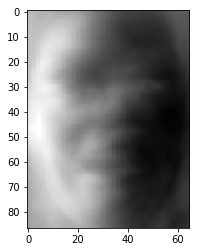

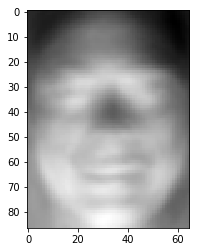

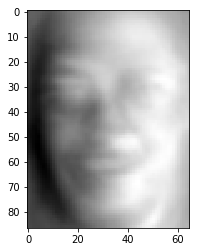

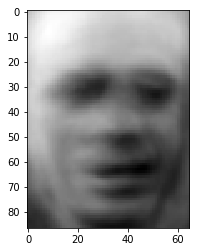

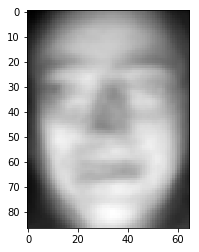

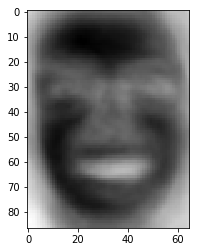

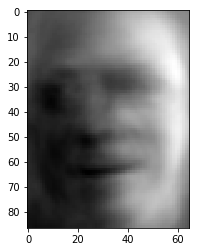

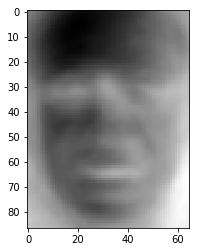

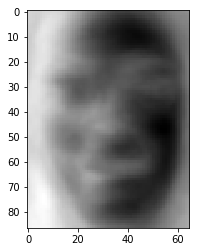

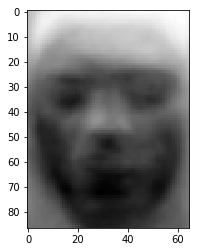

.........image closest to the cluster centers.............


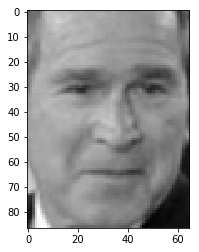

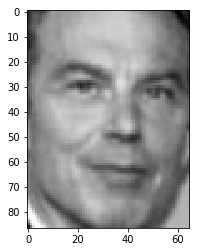

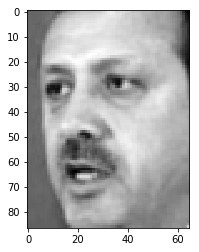

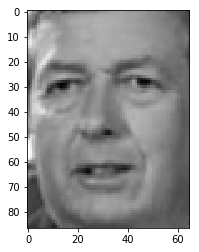

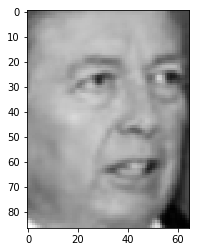

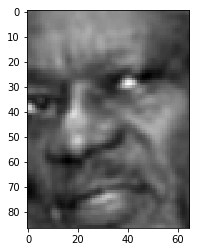

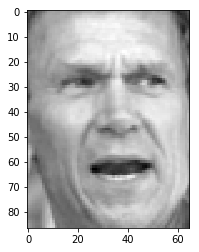

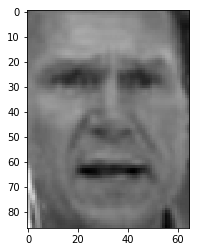

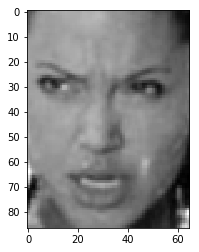

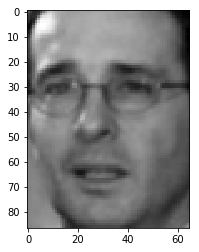

.........image farthest to the cluster centers.............


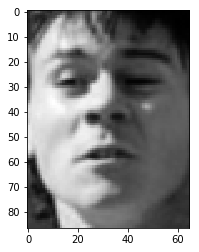

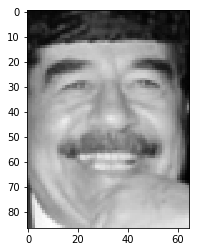

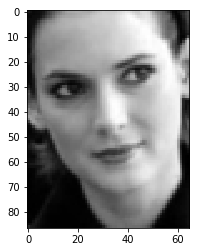

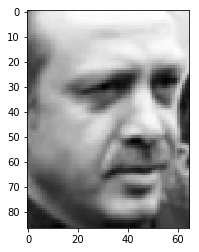

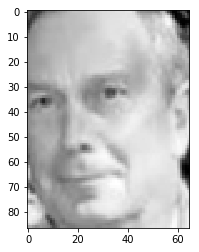

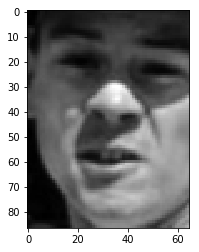

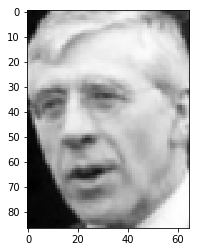

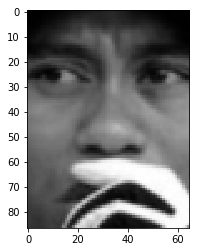

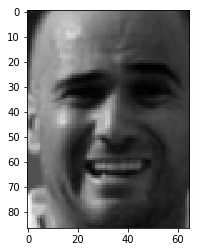

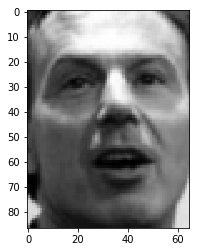

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import math
import operator
from numpy import linalg as LA
import random
from statistics import mean 

# def standardize(data):
#     mean= np.mean(data)
#     std = np.std(data)
#     xStd = (data-mean)/std
#     return xStd

def near(firstPts,listoflist,X_train,copy): 
    print(".........image closest to the cluster centers.............")
    ind=0
    closest=[]
    for x in listoflist:
        min=100000
        ind=0
        for y in x:

            distance=np.linalg.norm(y-firstPts[ind])
            if distance < min:
                min = distance
                closestone=y
        closest.append(closestone)   
    closest=np.array(closest) 
    closest.shape
    for c in closest:
        i=0
        for x in X_train:

            result = np.where(x == c)
            if len(result[0])==100:
                index=i
            i+=1
        #print(index) 
        copy[index].shape
        rs=copy[index].reshape(87,65)
        plt.imshow(rs,cmap='gray')
        plt.show()

def far(firstPts,listoflist,X_train,copy):    
    print(".........image farthest to the cluster centers.............")

    ind=0
    closest=[]
    for x in listoflist:
        maxi=0
        ind=0
        for y in x:

            distance=np.linalg.norm(y-firstPts[ind])
            if distance > maxi:
                maxi = distance
                closestone=y
        closest.append(closestone)   
    closest=np.array(closest) 
    closest.shape
    for c in closest:
        i=0
        for x in X_train:

            result = np.where(x == c)
            if len(result[0])==100:
                index=i
            i+=1
        #print(index) 
        copy[index].shape
        rs=copy[index].reshape(87,65)
        plt.imshow(rs,cmap='gray')
        plt.show()
        


def randomise(X_train,k):
    firstPts=[]
    random.seed(1)
    for i in range(k):
        initial_index=random.randint(0,len(X_train)-1)
        firstPts.append(X_train[initial_index])
    return firstPts 

def calcnew(listoflist):
    midpt=[]
    for x in range(len(listoflist)):
        av=np.average(listoflist[x], axis = 0)
        midpt.append(av)
    return midpt

def makelstoflst(X_train,firstPts):
    listoflist = [ [] for _ in range(k)]
    for x in X_train:
        min=100000
        for y in range(len(firstPts)):

            distance=np.linalg.norm(x-firstPts[y])

            if distance < min:
                min = distance
                cluster = y
        listoflist[cluster].append(x) 
    return listoflist         
    

def standardise(X):
    mean= np.mean(X, axis=0)
    std = np.std(X, axis=0, ddof=1)
    trainxStd = (X-mean)/std
    return trainxStd 

def eigenV(data,cov,k):
    pm=[]
    w, v = LA.eig(cov)
    idx = w.argsort()[::-1]
    w = w[idx]
    v = v[:, idx]
    for i in range(k):
        pm.append(v[:,i])
    usethis=np.array(pm)
    
    return(usethis.transpose(),w)

def step6(firstPts,evec):
    #firstPts=np.transpose(firstPts)
    for x in range(0,10):
        x=np.dot(evec,firstPts[x])
        rs=x.reshape(87,65)
        plt.imshow(rs,cmap='gray')
        plt.show()
        evec.shape


def covar(X):
    xt=X.transpose()
    xtx=np.dot(xt,X)
    N=len(X)
    xtx=xtx/(N-1)
    return(xtx)

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape=people.images[0].shape
# fig, axes= plt.subplots(2,5,figsize=(15,8),subplot_kw={'xticks':(),'yticks':()})
# for target, image , ax in zip(people.target, people.images, axes.ravel()):
#     ax.imshow(image, cmap=cm.gray)
#     ax.set_title(people.target_names[target])
# print("people.images.shape: {}".format(people.images.shape))
# print("Number of classes: {}".format(len(people.target_names)))
# counts=np.bincount(people.target)
for i,(count,name)in enumerate(zip(counts,people.target_names)) :
    print("{0:25}{1:3}".format(name,count),end=' ')
    if(i+1)%3==0:
        print()
mask =np.zeros(people.target.shape,dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target==target)[0][:50]]=1
X_people=people.data[mask]
y_people=people.target[mask]
X_people=X_people/255.        
X_train,X_test,y_train,y_test=train_test_split(X_people,y_people,stratify=y_people,random_state=0)
# knn=KNeighborsClassifier(n_neighbors=1)
# knn.fit(X_train,y_train)
X_train=np.array(X_train)
copy=X_train
X_train=standardise(X_train)
c_train=covar(X_train)
k=100

evec,evtrain=eigenV(X_train,c_train,100)
X_train = np.matmul(X_train, evec)


print("shape afterwards", X_train.shape)
X_test=np.array(X_test)
X_test=standardise(X_test)
c_test=covar(X_test)
k=100

evec1,evtest=eigenV(X_test,c_test,100)
X_test = np.dot(X_test, evec)

k=10
firstPts=randomise(X_train,k)


listoflist=makelstoflst(X_train,firstPts)
maxItr =100
mindiff=0.001
manhatdist=0
itr=0
diff=10
while (mindiff<diff and itr<maxItr):
    new=calcnew(listoflist)
    
    listoflist=makelstoflst(X_train,new)
    diff=np.sum(np.abs(np.array(firstPts)-np.array(new)))
    manhatdist=0
    firstPts = new
    itr+=1
    
    
for x in listoflist:
    print(len(x))
    
print("iterations",itr)
firstPts=np.array(firstPts) 
step6(firstPts,evec)
near(firstPts,listoflist,X_train,copy)
far(firstPts,listoflist,X_train,copy)